In [135]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plot
import nltk

In [136]:
df = pd.read_csv("spam.csv", encoding= "ISO-8859-1")

In [137]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [139]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1 , inplace= True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [140]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [141]:
encoder= LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
#checking for missing values
df.isnull().sum()


target    0
text      0
dtype: int64

In [143]:
#checking for duplicate values & remove
df.duplicated().sum()
df = df.drop_duplicates(keep='first')
df.shape


(5169, 2)

In [144]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

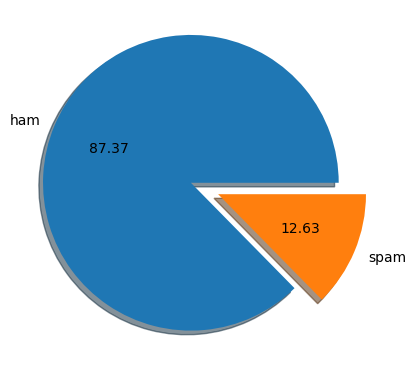

In [146]:

plot.pie(df['target'].value_counts(), labels = ['ham','spam'],  explode= (0.2,0), autopct= "%0.2f",shadow=True)
plot.show()

In [155]:
nltk.download('punkt')
df['num_chars']= df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sents']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hello\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Hello\AppData\Local\Temp\ipykernel_12808\123369763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_chars']= df['text'].apply(len)
C:\Users\Hello\AppData\Local\Temp\ipykernel_12808\123369763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\Hello\AppData\Loca

In [156]:
df.head()

,target,text,num_chars,num_words,num_sents,transformedText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [157]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string 
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

#data preprocessing
def transformText(text):
    text = text.lower()
    text =nltk.word_tokenize(text)

    y =[]
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(ps.stem(i))
    return " ".join(y)

df['transformedText']=df['text'].apply(transformText)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hello\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Hello\AppData\Local\Temp\ipykernel_12808\3657412300.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformedText']=df['text'].apply(transformText)


In [154]:
df.head()

,target,text,num_chars,num_words,num_sents,transformedText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


In [185]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
cv= CountVectorizer()
bnb =BernoulliNB()
gnb =GaussianNB()
mnb = MultinomialNB()

x =cv.fit_transform(df['transformedText']).toarray()
y =df['target'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x)

bnb.fit(x_train, y_train)
y_pred=bnb.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.9661508704061895
0.9661016949152542
[[885   4]
 [ 31 114]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [190]:

tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['transformedText']).toarray()
print(x)

bnb.fit(x_train, y_train)
y_pred=bnb.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.9661508704061895
0.9661016949152542
[[885   4]
 [ 31 114]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [202]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)

from sklearn.ensemble import VotingClassifier


In [197]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [199]:
voting.fit(x_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [200]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 1.0


In [201]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
np.random(y_pred)
